# 크롤링 테스트

In [ ]:
import os
import sys
import urllib.request

In [ ]:
import pandas as pd
import numpy as np

# 크롤링 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 함수로 정의 / txt 파일로 저장

import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

# 불필요한 내용 제거

In [42]:
data=pd.read_excel("/content/drive/MyDrive/outlier/channelA_news.xlsx")
#data=data['comment']
data

,comment,author,date,num_likes
0,염치없는것들이 타국군인들이 타국이 목숨바쳐가며 수백조 쏟아가며<br>나라재건하라니 ...,페미박멸 좌빨우빨정치코인박멸,2021-09-12T05:36:10Z,0
1,아프칸 출신 6명을 방3개 나누어 생활 --&gt; 한국군인들이 가서 도와준것도 모...,Dong Kin,2021-09-04T04:51:59Z,0
2,개찌증나네<br>저거,Jo y,2021-08-31T14:41:32Z,0
3,남자 새귀들은 가서 안싸울꺼냐? 한국세금으로 공짜유학하는 주제에 요구사항은 사돈에 ...,Ready Player One,2021-08-31T11:18:02Z,0
4,한국유학 4년째인데 한국말 못하나?,사랑해,2021-08-31T08:46:52Z,0
...,...,...,...,...
677,이미받은사람들은 보내라..쫌 이슬람애들 많다 이러다가 이슬람애들 차지가 된다고ㅠㅠ,귀여워요돌이,2021-08-24T11:20:12Z,60
678,@뉴런이프간인들은 지네 나라 잃고 타국에 와서도 지들 방식으로만 하려고 하고....,이진우,2021-08-31T18:08:32Z,0
679,@미니어쳐LOVE 저도요..남자들도 그 복장 있거든요? 그것도 싫습니다,귀여워요돌이,2021-08-25T01:46:07Z,0
680,뒤집어쓰고목에두르고 다니는거 보는것도재수없다,미니어쳐LOVE,2021-08-25T01:42:32Z,1


In [40]:
# 한글과 띄어쓰기만 추출
import re
result=[]
hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
#hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')

for i in range(len(data)):
  result.append(hangul.sub('', data['comment'][i])) 
result

TypeError: ignored

In [ ]:
for k in range(len(result)):
  result[k]=result[k].replace('\n',' ')
  result[k]=result[k].replace('\t',' ')

# 불필요한 내용 제거
   

In [ ]:
#result_split = result.split('포스팅 내용')
#result_split[1]
#result_split
result[1]

'안전하게 정우성집으로 보내면되겠네 보안빵빵해서 절대안전하고 또 정우성도 난민을사랑하니깐 서로좋을듯'

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt',"w", encoding='utf-8')
file.write(str(result))
file.close()

# 형태소 분석

In [ ]:
data_split = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt', 'r', encoding='utf-8').read()
data_split = [[data_split,1]]
print(data_split)

[["['어쩔 수 없습니다 우리도 먹고 살아야 하는데 난민은 이정도만 받는게 좋을것 같네요', '안전하게 정우성집으로 보내면되겠네 보안빵빵해서 절대안전하고 또 정우성도 난민을사랑하니깐 서로좋을듯', '진짜 징그럽다 ㅋㅋ 나라 팔아먹은 매국노들이 뭔 동정을 구하고있냐', '니네가 협력을 하긴 했냐 오지마', '구독자 만명 찍기아무것도 안하고 꺼져', 'ㅈㄹ 대부분이 한국대사관한국병원한국건설사에서 일한 통역기술자의사간호사 고인력들임 너같은 잉여인간보다 훨씬 값어치 있는 사람들이다', '안되', '아프간과 한국 상황 전혀 달라 선동 멈춰야 주한미군 없다해도 세 가지 이유에서 한국은 북한에게 지고싶어도 질 수 없어 세상사 영원한 친구도 영원한 적도 없어내 나라는 내가 피흘려 지킨다는 의지 사수 주한미군 철수는 절대 안되지만 없다는 가정하에 강력한 군사력 갖춰야주한미군이 미국에도 이익이 있게끔 철저한 관리 필요아프간 사태 관련 일침거사 영상 시청 부탁드립니다', '검토중ㅋㅋㅋㅋ이미  극비리에 작전중이면서ㅋㅋㅋ', '지금 난민에게서 코로나 확진자 나왔네요 그런데도 또 난민을 받는다면 혹 영주권이라도 준다면 촛불시위라도 해야됩니다인도주의적으로 생각하면 안타깝지만 자국민의 생명과 안전이 우선이라는 사실을 잊지말았으면 합니다', '진짜 잣같은나라 때문에 다른나라들이 피해보네 이슬람이라 아슬람인가 그거부터 버리고 오면 받아줄듯', '우리는 매년 수천명씩 북한 난민 받고 있는데 거기다 어떻게 중동 난민까지 받냐 이번에 오신 여명만 이라도 잘 보살펴드리자', '인구도 적은데 다문화 가자', '오더라도 신안은 조심하십쇼', '딴건 모르겠고 재내들 크면 군대가냐 무슬림이라고 면제 할거냐고', '야 근데 쟤네들 총쥐어줘도되냐 그냥 무기 안주고 삽질만 시키는게 낫지않겠냐', '이슬람을 버리는조건부로 입국시켜라 아님 우리나라 앞날이 무섭다', '정부도와준 사람은 그렇다쳐도 그외 사기업 등에서 온 사람은 반대합니다 도운건 그냥 해주는게 돕는거고 돈받고 일했잖아요 프랑스에서 살다왔는데 무슬림들

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 3.6 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 448 kB 20.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt

okt = Okt()

def tokenize(doc):
    return [t for t in okt.pos(doc, norm=True, stem=True)]      # norm은 정규화, stem은 근어로 표시

tokenize_docs = [(tokenize(row[0]), row[1]) for row in data_split]

with open('/content/drive/MyDrive/Colab Notebooks/tokenized_data', 'w', encoding="utf-8") as make_file:     # JSON 파일로 저장
    json.dump(tokenize_docs, make_file, ensure_ascii=False, indent="\t")
tokenize_docs[0]

([("['", 'Punctuation'),
  ('어쩔', 'Adverb'),
  ('수', 'Noun'),
  ('없다', 'Adjective'),
  ('우리', 'Noun'),
  ('도', 'Josa'),
  ('먹다', 'Verb'),
  ('살다', 'Verb'),
  ('하다', 'Verb'),
  ('난민', 'Noun'),
  ('은', 'Josa'),
  ('이', 'Determiner'),
  ('정도', 'Noun'),
  ('만', 'Josa'),
  ('받다', 'Verb'),
  ('좋다', 'Adjective'),
  ('같다', 'Adjective'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('안전하다', 'Adjective'),
  ('정우성', 'Noun'),
  ('집', 'Noun'),
  ('으로', 'Josa'),
  ('보내다', 'Verb'),
  ('겠다', 'Verb'),
  ('보안', 'Noun'),
  ('빵빵', 'Noun'),
  ('하다', 'Verb'),
  ('절대', 'Noun'),
  ('안전하다', 'Adjective'),
  ('또', 'Noun'),
  ('정우성', 'Noun'),
  ('도', 'Josa'),
  ('난민', 'Noun'),
  ('을', 'Josa'),
  ('사랑', 'Noun'),
  ('하', 'Suffix'),
  ('니깐', 'Josa'),
  ('서로', 'Noun'),
  ('좋다', 'Adjective'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('진짜', 'Noun'),
  ('징그럽다', 'Adjective'),
  ('ㅋㅋ', 'KoreanParticle'),
  ('나라', 'Noun'),
  ('팔', 'Noun'),
  ('아', 'Josa'),
  ('먹다', 'Verb'),
  ('매국노', 'Noun'),
  ('들', 'Suffi

# 워드클라우드

In [ ]:
# 빈도수 세기

from collections import Counter
counter = Counter(tokenize_docs[0][0])
count_words = sorted(counter.items(), key=lambda x:-x[1])
count_words

[(('하다', 'Verb'), 2581),
 (("',", 'Punctuation'), 2426),
 (("'", 'Punctuation'), 2426),
 (('들', 'Suffix'), 1963),
 (('이', 'Josa'), 1474),
 (('에', 'Josa'), 1257),
 (('을', 'Josa'), 1245),
 (('은', 'Josa'), 1045),
 (('도', 'Josa'), 890),
 (('가', 'Josa'), 871),
 (('난민', 'Noun'), 823),
 (('받다', 'Verb'), 723),
 (('한국', 'Noun'), 721),
 (('있다', 'Adjective'), 599),
 (('를', 'Josa'), 587),
 (('의', 'Josa'), 562),
 (('아니다', 'Adjective'), 515),
 (('나라', 'Noun'), 508),
 (('사람', 'Noun'), 503),
 (('는', 'Josa'), 494),
 (('으로', 'Josa'), 482),
 (('이슬람', 'Noun'), 471),
 (('되다', 'Verb'), 462),
 (('에서', 'Josa'), 434),
 (('우리', 'Noun'), 383),
 (('없다', 'Adjective'), 373),
 (('아프간', 'Noun'), 365),
 (('로', 'Josa'), 325),
 (('오다', 'Verb'), 318),
 (('보다', 'Verb'), 311),
 (('국민', 'Noun'), 305),
 (('우리나라', 'Noun'), 298),
 (('미국', 'Noun'), 292),
 (('도와주다', 'Verb'), 286),
 (('협력', 'Noun'), 275),
 (('종교', 'Noun'), 275),
 (('그', 'Noun'), 274),
 (('적', 'Suffix'), 272),
 (('하고', 'Josa'), 271),
 (('것', 'Noun'), 269),
 (('않다'

In [ ]:
# 명사만 추출
noun_count = {x[0][0]:x[1] for x in count_words if x[0][1]=='Noun' and len(x[0][0])>=2 and '동덕' not in x[0][0]}
noun_count

{'난민': 823,
 '한국': 721,
 '나라': 508,
 '사람': 503,
 '이슬람': 471,
 '우리': 383,
 '아프간': 365,
 '국민': 305,
 '우리나라': 298,
 '미국': 292,
 '협력': 275,
 '종교': 275,
 '수용': 235,
 '생각': 234,
 '문제': 204,
 '반대': 203,
 '지금': 165,
 '국가': 159,
 '무슬림': 155,
 '절대': 139,
 '정부': 134,
 '탈레반': 132,
 '대한민국': 121,
 '자기': 120,
 '도움': 118,
 '진짜': 112,
 '그냥': 109,
 '위해': 109,
 '가족': 95,
 '전쟁': 92,
 '문화': 92,
 '달라': 85,
 '소리': 83,
 '북한': 82,
 '도운': 82,
 '때문': 77,
 '무슨': 77,
 '정도': 75,
 '다른': 75,
 '사업': 73,
 '유럽': 72,
 '상황': 69,
 '테러': 67,
 '한국인': 67,
 '제발': 67,
 '지원': 65,
 '누가': 65,
 '여자': 65,
 '미군': 64,
 '이유': 63,
 '하나': 62,
 '사회': 62,
 '미얀마': 60,
 '중국': 60,
 '세금': 59,
 '코로나': 52,
 '인간': 51,
 '자유': 50,
 '일본': 48,
 '거기': 47,
 '기업': 45,
 '거지': 45,
 '국내': 44,
 '자신': 44,
 '사원': 44,
 '정말': 44,
 '얼마나': 44,
 '찬성': 44,
 '그게': 43,
 '시위': 43,
 '범죄': 42,
 '외국인': 42,
 '너희': 42,
 '남자': 41,
 '정치': 41,
 '목숨': 40,
 '댓글': 40,
 '민족': 40,
 '추방': 40,
 '교회': 39,
 '세계': 39,
 '검토': 38,
 '보고': 38,
 '먼저': 37,
 '파병': 37,
 '뉴스': 36,
 '외국': 36,
 '

In [ ]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fm._rebuild()
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = " + fontInfo.fname)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicE

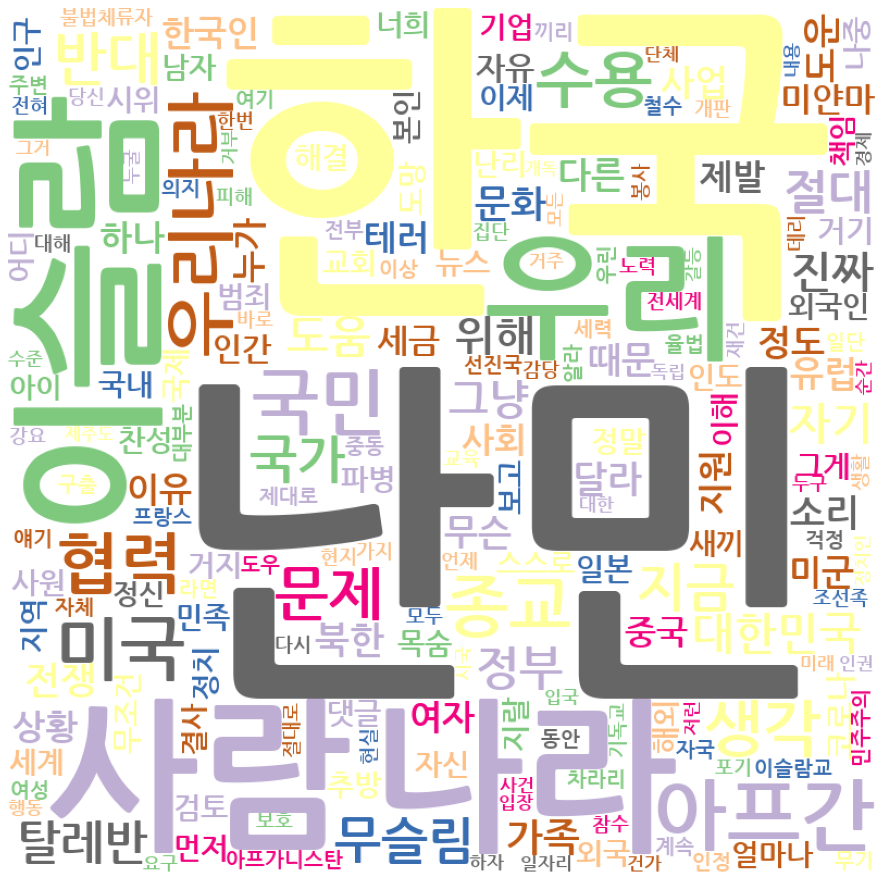

In [38]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'   # 원하는 폰트 지정

wordcloud = WordCloud(
    max_words=200, #최대 수용 단어 갯수
    background_color='white', #배경색상
    font_path=font_path,
    width = 800, #넓이
    height = 800, #길이
    colormap='Accent_r')
    
wordcloud.generate_from_frequencies(dict(noun_count))

fig =  plt.figure(figsize=(25,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/word_cloud.jpg')